In [2]:
import snntorch as snn
from snntorch import spikeplot as splt
from snntorch import spikegen

import torch
import torch.nn as nn

import numpy as np
import matplotlib.pyplot as plt

In [3]:
time_step = 1e-3
R = 5.1
C = 5e-3
num_steps = 200

In [5]:
# Create the same neuron as before using snnTorch
lif2 = snn.Lapicque(R=5.1, C=5e-3, time_step=1e-3)

print(f"Membrane potential time constant: {lif2.R * lif2.C:.3f}s")
"Membrane potential time constant: 0.025s"

Membrane potential time constant: 0.025s


'Membrane potential time constant: 0.025s'

In [6]:
# Initialize inputs and outputs
cur_in = torch.cat((torch.zeros(10), torch.ones(190)*0.2), 0)
mem = torch.zeros(1)
spk_out = torch.zeros(1)
mem_rec = [mem]
spk_rec = [spk_out]

# Simulation run across 100 time steps.
for step in range(num_steps):
  spk_out, mem = lif2(cur_in[step], mem)
  mem_rec.append(mem)
  spk_rec.append(spk_out)

# convert lists to tensors
mem_rec = torch.stack(mem_rec)
spk_rec = torch.stack(spk_rec)

In [7]:
def plot_cur_mem_spk(current_input, membrane_record, spk_record, title, 
                     thr_line=None, vline=None, yline=None, ylim_max2=None):
    plt.figure(figsize=(6, 8))

    # Plot current input
    plt.subplot(3, 1, 1)
    plt.plot(current_input.numpy(), color='orange')
    plt.title("Input Current")
    plt.xlabel("Time step")
    plt.ylabel("Input Current (I_in)")
    plt.ylim(0, 0.4)
    if vline:
        plt.axvline(x=vline, color='gray', linestyle='--')

    # Plot membrane potential
    plt.subplot(3, 1, 2)
    plt.plot(membrane_record.detach().numpy(), color='blue')
    plt.title("Membrane Potential")
    plt.xlabel("Time step")
    plt.ylabel("Membrane Potential (Umem)")
    if ylim_max2:
        plt.ylim(0, ylim_max2)
    else:
        plt.ylim(0, 1.25)
    if yline:
        plt.axhline(y=yline, color='gray', linestyle='--')
    if thr_line:
        plt.axhline(y=thr_line, color='red', linestyle='--')
    if vline:
        plt.axvline(x=vline, color='gray', linestyle='--')

    # Plot output spikes
    #plt.subplot(3, 1, 3)
    #spike_times = [np.flatnonzero(spk_record.numpy())] 
    #plt.eventplot(spike_times, orientation='horizontal', colors='black', linelengths=1)

    #plt.title("Output Spikes")
    #plt.xlabel("Time step")
    #plt.ylabel("Spikes")
    #plt.yticks([])
    #plt.xlim(0, len(spk_record.numpy()))
    #if vline:
    #    plt.axvline(x=vline, color='gray', linestyle='--')
    #for spike_time in spike_times:
    #    plt.axvline(x=spike_time, color='black', linestyle='-')
    
    
    gs = plt.GridSpec(3, 1, height_ratios=[1, 1, 0.4])  
    # Plot output spikes with eventplot
    ax3 = plt.subplot(gs[2])  # Use the third row of the GridSpec
    spike_times = [np.flatnonzero(spk_record.numpy())] 
    ax3.eventplot(spike_times, orientation='horizontal', colors='black', linelengths=1)
    ax3.set_title("Output Spikes")
    ax3.set_xlabel("Time step")
    ax3.set_ylabel("Spikes")
    ax3.set_xlim(0, len(spk_record.numpy()))  
    ax3.set_yticks([])  # Hide y-axis labels
    if vline:
        ax3.axvline(x=vline, color='gray', linestyle='--')
        
    plt.suptitle(title, fontsize=16)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

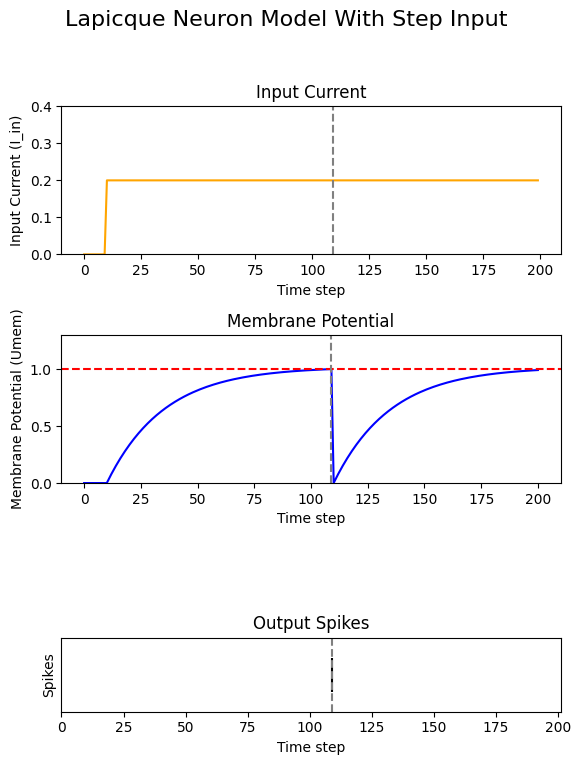

In [8]:
plot_cur_mem_spk(cur_in, mem_rec, spk_rec, thr_line=1, vline=109, ylim_max2=1.3,
                 title="Lapicque Neuron Model With Step Input")

In [9]:
print(spk_rec[105:115].view(-1))

tensor([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.])


In [10]:
# Initialize inputs and outputs
cur_in = torch.cat((torch.zeros(10), torch.ones(190)*0.3), 0)  # increased current
mem = torch.zeros(1)
spk_out = torch.zeros(1)
mem_rec = [mem]
spk_rec = [spk_out]

# neuron simulation
for step in range(num_steps):
  spk_out, mem = lif2(cur_in[step], mem)
  mem_rec.append(mem)
  spk_rec.append(spk_out)

# convert lists to tensors
mem_rec = torch.stack(mem_rec)
spk_rec = torch.stack(spk_rec)

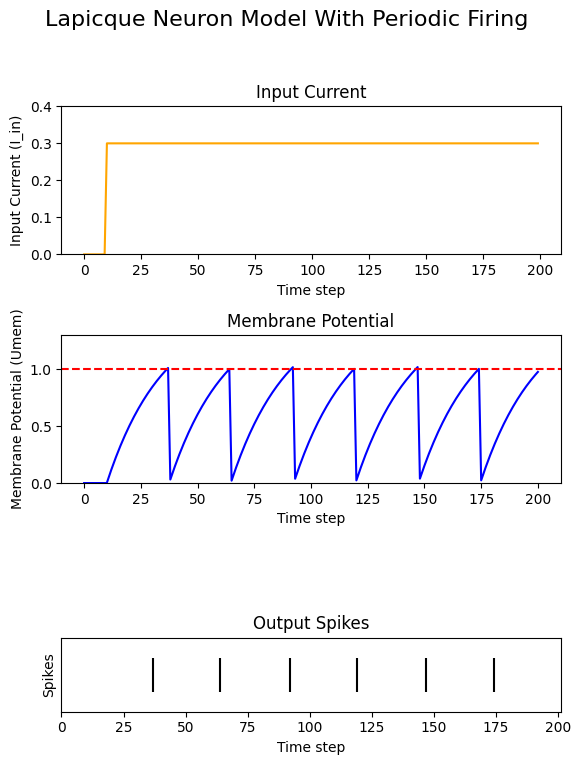

In [11]:
plot_cur_mem_spk(cur_in, mem_rec, spk_rec, thr_line=1, ylim_max2=1.3,
                 title="Lapicque Neuron Model With Periodic Firing")

In [12]:
# neuron with halved threshold
lif3 = snn.Lapicque(R=5.1, C=5e-3, time_step=1e-3, threshold=0.5)

# Initialize inputs and outputs
cur_in = torch.cat((torch.zeros(10), torch.ones(190)*0.3), 0)
mem = torch.zeros(1)
spk_out = torch.zeros(1)
mem_rec = [mem]
spk_rec = [spk_out]

# Neuron simulation
for step in range(num_steps):
  spk_out, mem = lif3(cur_in[step], mem)
  mem_rec.append(mem)
  spk_rec.append(spk_out)

# convert lists to tensors
mem_rec = torch.stack(mem_rec)
spk_rec = torch.stack(spk_rec)

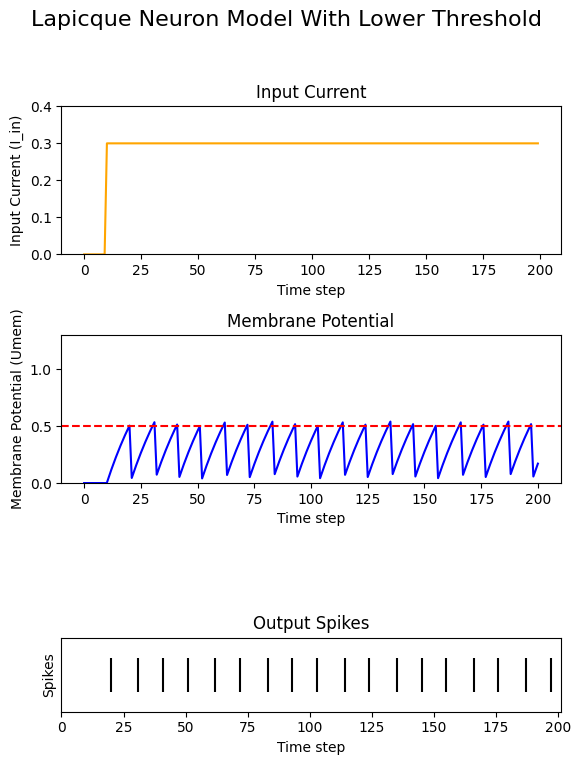

In [13]:
plot_cur_mem_spk(cur_in, mem_rec, spk_rec, thr_line=0.5, ylim_max2=1.3,
                 title="Lapicque Neuron Model With Lower Threshold")